# SIMULACIÓN: LABORATORIO 1
### Entrega: martes 24 de agosto 2021, 23:59 horas


### CONTENIDOS
- Ejemplo del lanzamiento de monedas
- Conceptos: Espacio muestral, evento, probabilidad
- Principios de probabilidad y propiedades



### ¿Cómo asignamos valores de probabilidad?

- $\textbf{Enfoque frecuentista relativo o de simulación:}$ Sea $n$ el número de experimentos, y $n(A)$ el número de veces que el evento $A$ ocurre en la realización de esos experimentos, entonces $P(A) = \frac{n(A)}{n}$

- $\textbf{Enfoque frecuentista clásico:}$ Sea $n(A)$ el número elementos en el evento $A$, y $n(\Omega)$ el número de elementos en el espacio muestral $\Omega$, entonces $P(A) = \frac{n(A)}{n(\Omega)}$

- $\textbf{Enfoque Bayesiano:}$ Yo pienso que la probabilidad de que me gane un proyecto es $0.9$ (probabilidad a priori).

In [10]:
from IPython.core.display import Image, display
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

## Lanzamiento de monedas

In [2]:
# Define algunos parámetros del contexto de trabajo
sns.set_context("notebook", 
                font_scale=1.5, 
                rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')
# Crea dic variables de color que serán usadas en este contexto
rojo= sns.xkcd_rgb['vermillion']
azul= sns.xkcd_rgb['dark sky blue']


In [3]:
#utilzaremos la distribución binomial para modelar el experimento del lanzamiento de una moneda n veces
def factorial(n):
    """Calcula factorial de `n`
    """
    vals = list(range(1, n + 1))
    if len(vals) <= 0:
        return 1

    prod = 1
    for val in vals:
        prod *= val
        
    return prod
    
    
def n_choose_k(n, k):
    """Calcula la combinatoria de n y k 
    """
    return factorial(n) / (factorial(k) * factorial(n - k))


def binom_prob(n, k, p):
    """Retorna la probabilidad de que ocurran `k` caras in `n` lanzamientos de una moneda
    
    Argumentos:
    
    n - número de ensayos
    k - número de ensayos en los que se obtiene cara
    p - probabilidad de que el evento "obtener cara" ocurra
    
    """
    return n_choose_k(n, k) * p**k * (1 - p)**(n - k)

def lanzaMoneda(N_caras, N_exper): 
    # Calcula la probabilidad de cada posible salida (N_caras) 
    # del experimento de lanzar N_exper veces una moneda equilibrada
    probabilidades = [binom_prob(N_exper, k, 0.5) for k in range(1, N_exper + 1)]
    #p_value es la probabilidad de que la salida sea mayor o igual que N_caras
    p_value = (np.sum(probabilidades[N_caras-1:]))
    # Grafica la distribución de probabilidad calculada
    plt.step(range(1, N_exper + 1), probabilidades, where='mid', color=azul)
    plt.xlabel('número de caras')
    plt.ylabel('probabilidad')
    plt.plot((N_caras, N_caras), (0, max(probabilidades)), color=rojo)
    
    porc = round((p_value)*100,3)
    plt.annotate( str(porc) + '%', 
                 xytext=(N_caras + 10, max(probabilidades)/2), 
                 xy=(N_caras, max(probabilidades)/2), 
                 multialignment='right',
                 va='center',
                 color=rojo,
#                  size='large',
                 arrowprops={'arrowstyle': '<|-', 
                             'lw': 1, 
                             'color': rojo, 
                             'shrinkA': 1})
    return p_value*100

83.88818398212265

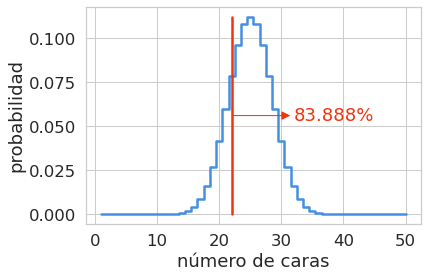

In [4]:
lanzaMoneda(22,50)

P-value simulado: 78.0%


83.88818398212265

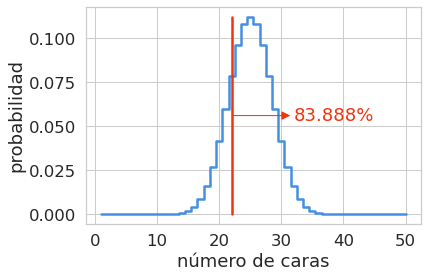

In [5]:
#Simularemos directamente el lanzamiento de la moneda considerando # valores aleatorios para el resultado de cada lanzamiento
M = 0
n = 100  # cambie este valor.
N_caras = 22
N_exper = 50
for i in range(n):
    #genera N_exper valores aleatorios 0 o 1
    ensayos = np.random.randint(2, size=N_exper)
    if (ensayos.sum() >= N_caras):
        M += 1
p = M / n

print("P-value simulado: %0.1f%%" % (p * 100))
lanzaMoneda(N_caras,N_exper)

### Pregunta 1
**i) Utilice distintos valores para N_caras y N_exper ¿Qué es el valor "p" en ambos casos?**

50.0

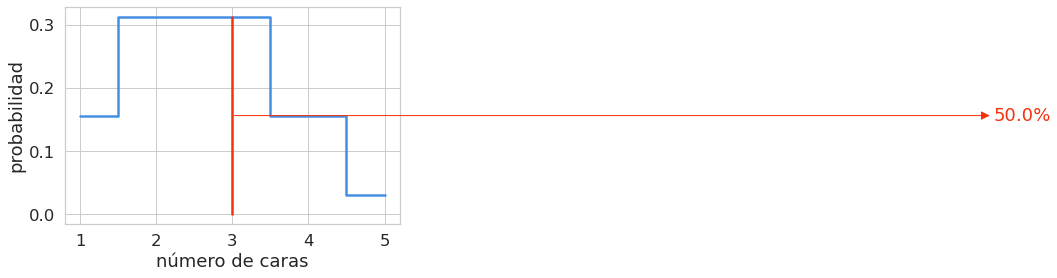

In [6]:
lanzaMoneda(3,5)

_Acorde a la bibliografía presentada, el p-value equivale a la probabilidad de que un valor estadístico sea posible dada una hipótesis nula cierta. En simples palabras, el valor p ayuda a diferenciar resultados que son producto del azar del muestreo, de resultados que son estadísticamente significativos. En el caso de esperar 3 caras en 5 lanzamientos tenemos un p-value del 50%, este valor contempla todas las posibles permutaciones que alberguen **al menos** tres caras._   

**ii) En el código de la simulación, considere valores crecientes de n ¿Desde qué cantidad la simulación reemplaza el análisis estadístico? Agregue código para graficar el comportamiento de convergencia de la simulación al valor obtenido utilizando la distribución binomial.**

Para n= 10  el p-value simulado es: 90.0%
Para n= 100  el p-value simulado es: 80.0%
Para n= 1000  el p-value simulado es: 84.2%
Para n= 10000  el p-value simulado es: 83.8%
Para n= 100000  el p-value simulado es: 83.9%
Para n= 1000000  el p-value simulado es: 83.9%
Para n= 10000000  el p-value simulado es: 83.9%


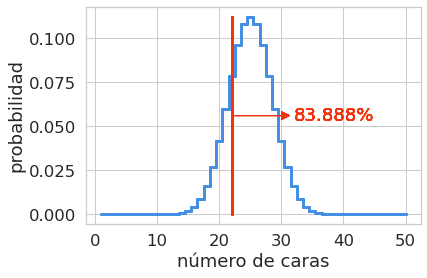

In [7]:
n = np.array([10, 100, 1000, 10000, 100000, 1000000, 10000000])
p_obtenidos = []

def Simulacion(n):
    M = 0
    N_caras = 22
    N_exper = 50
    for i in range(n):
        #genera N_exper valores aleatorios 0 o 1
        ensayos = np.random.randint(2, size=N_exper)
        if (ensayos.sum() >= N_caras):
            M += 1
    p = M / n

    print("Para n=", n, " el p-value simulado es: %0.1f%%" % (p * 100))
    lanzaMoneda(N_caras,N_exper)
    return p*100

for i in n:
    p_obtenidos.append(Simulacion(i))

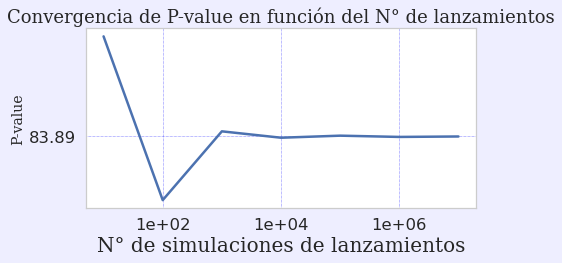

In [8]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='#EEF')
ax.set_xscale('log')
x_labels = ax.get_xticks()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))
ax.set_title("Convergencia de P-value en función del N° de lanzamientos", fontname='serif')
ax.set_xlabel('N° de simulaciones de lanzamientos', fontsize=20, fontname='serif')
ax.set_ylabel('P-value', fontsize=14, fontname='serif')
ax.set_yticks([p_obtenidos[-1]])
ax.grid(color="blue", which="major", axis='both', linestyle=':', linewidth=0.5)

ax.plot(n, p_obtenidos)

Es posible observar que a medida que aumenta el número de lanzamientos de la moneda, el p-value tiende a un valor cercano a 83.9. Se puede observar en la gráfica que este valor se consigue cuando el número de lanzamientos es cercano a 1000, luego de este número la tendencia se hace evidente.

Una interpretación de este fenómeno es que mientras realicemos más pruebas, iremos acercandonos a un mayor nivel de veracidad al momento de evaluar nuestras afirmaciones. 

### Pregunta 2 
En un certamen literario hay 3 premios: ganador, finalista y mención honrosa. Cada participante sólo puede obtener un premio. Si participan 12 personas en el certamen, se puede definir, el espacio muestral de los posibles resultados como:

${S = \{ \text{todas las formas de ordenar } (1,2,3,4,5,6,7,8,9,10,11,12) \}}$

En donde los números identifican a cada una de las 12 personas y  las primeras tres ubicaciones corresponden a los escritores premiados.

Sea ${A}$ el evento en que la persona #1 es ganador, el evento ${B}$ denota que la persona #2 no gana ningún premio, y el evento ${C}$ es que la persona #3 gana la mención honrosa.

Simule las probabilidades de los siguientes eventos y compare con los valores teóricos:  

(i) $A \cup B$ 

(ii) $A \cap B$

(iii) $A \cap B \cap C$

(iv) $A \cup (B\cap C)$


puede usar random.shuffle de la biblioteca random para generar permutaciones aleatorias de [1,2,...,12] 

#### Respuesta
El número total de permutaciones del conjunto S viene dado por factorial de n, donde n es el número de elementos de S.

In [14]:
n = factorial(12)
n

479001600

El número de casos posibles para A viene dado por el factorial de n-1.

In [15]:
casos_a = factorial(11)
casos_a

39916800

### Pregunta 3

**(i)  Demuestre (b) y (c) en la propiedad de Independencia.**    
Si $A$ es independiente de $B$, entonces se cumple que:  
1. $ A $ es independiente de $B^C$    
2. $A^C$ es independiente de $B^C$

#### Demostración:
Podemos suponer que $P(A)\neq 0$ ó $1$ y $P(B) \neq 0$ ó $1 $, ya que los complementos en tales casos también son nulos o seguros y la independencia está garantizada.

1. $P(A\cap B^C) = P(A)P(B^C/A) = P(A)(1-P(B/A))=P(A)(1-P(B))=P(A)P(B^C)$

2. $P(A^C\cap B^C) = P(A^C)P(B^C|A^C)=P(A^C)(1-P(B|A^C)=P(A^C)(1-P(B))=P(A^C)P(B^C)$


**(ii) Demuestre el Teorema de las Probabiliades totales.**

Para realizar una demostración clara es menester explicar algunos conceptos.
##### ¿Qué es partición del espacio muestral? 
Se dice que $B_1, B_2, ..., B_n$ forman una partición del espacio muestral $S$ cuando cumplen las siguientes condiciones:   
1) $B_i \cap B_j = \phi $ para todo $i = j$ (miembros disjuntos)     
2) $B_i \neq \phi $ para todo $1 \leq i \leq n$ (miembros no vacíos)   
3) $B_1 \cup B_2  \cup B_3 \cup ... \cup B_n = S$ (unión de los miembros forma el espacio muestral)

#### Teorema:    
_Sea $B_1, B_2,..., B_n$ una partición sobre el espacio muestral y sea $A$ un suceso cualquiera del que se conocen las probabilidades condicionales $P(A|B_i)$, entonces la probabilidad del suceso $A$ viene dada por la expresión:_     

$P(A) = \sum_{i=1}^{n} P(A|B_i)P(B_i)$
#### Demostración:

![demo](https://seactuario.com/ContMatematicas/ImagesProbab/probtotal.png)

$A = (A \cap B_1) \cup (A \cap B_2) \cup (A \cap B_3) \cup ... \cup (A \cap B_n)$    
El suceso A está compuesto de elementos del espacio muestral particionado    
$P(A) = P[(A \cap B_1) \cup (A \cap B_2) \cup (A \cap B_3) \cup ... \cup (A \cap B_n)]$    
$P(A) = P(A \cap B_1)+P(A \cap B_2)+...+ P(A \cap B_n)$     
$P(A) = P(A|B_1)P(B_1) + P(A|B_2)P(B_2) + ... + P(A|B_n)P(B_n)$    
La probabilidad del suceso A se obtiene a partir de las uniones de los fragmentos que componen a A, fragmentos que tienen una probabilidad de ocurrencia y que cuando son sumados equivalen la probabilidad total del suceso. 

# Referencias
1. https://github.com/croach/statistics-for-hackers/blob/master/statistics-for-hackers.ipynb
2. Ross, S. M. (2006). Simulation. Elsevier.